# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from warnings import filterwarnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


%matplotlib inline
filterwarnings('ignore')

# Data

In [2]:
df = pd.read_csv("employee_preprocessed2")
df.head()

,age,dailyrate,distancefromhome,education,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,...,jobrole_manager,jobrole_manufacturing_director,jobrole_research_director,jobrole_research_scientist,jobrole_sales_executive,jobrole_sales_representative,maritalstatus_divorced,maritalstatus_married,maritalstatus_single,y
0,41,1102,1,2,2,0,94,3,2,4,...,0,0,0,0,1,0,0,0,1,1
1,49,279,8,1,3,1,61,2,2,2,...,0,0,0,1,0,0,0,1,0,0
2,37,1373,2,2,4,1,92,2,1,3,...,0,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,0,56,3,1,3,...,0,0,0,1,0,0,0,1,0,0
4,27,591,2,1,1,1,40,3,1,2,...,0,0,0,0,0,0,0,1,0,0


# Scaling

In [3]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(df)
df_scale = pd.DataFrame(X_scale, columns = df.columns)
df_scale.head()

,age,dailyrate,distancefromhome,education,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,...,jobrole_manager,jobrole_manufacturing_director,jobrole_research_director,jobrole_research_scientist,jobrole_sales_executive,jobrole_sales_representative,maritalstatus_divorced,maritalstatus_married,maritalstatus_single,y
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,-1.224745,1.383138,0.379672,-0.057788,1.153254,...,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650,2.280906
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,0.816497,-0.240677,-1.026167,-0.057788,-0.660853,...,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,-0.438422
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,0.816497,1.284725,-1.026167,-0.961486,0.246200,...,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,-0.918921,1.458650,2.280906
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-1.224745,-0.486709,0.379672,-0.961486,0.246200,...,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,-0.438422
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,0.816497,-1.274014,0.379672,-0.961486,-0.660853,...,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,-0.438422


# Elbow method

Text(0, 0.5, 'Sum of squared distances')

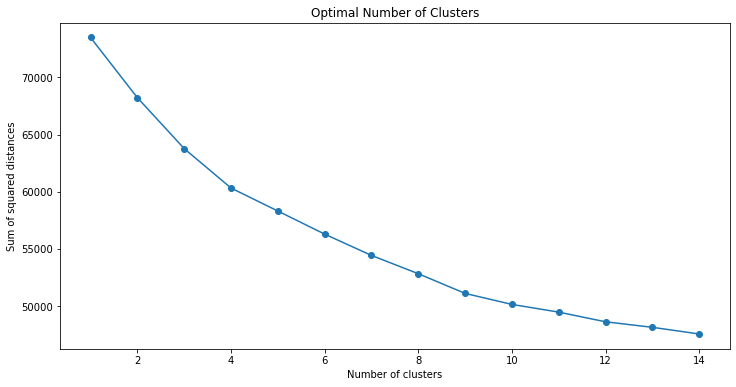

In [4]:
sse = []

for k in range(1, 15):
    
    km = KMeans(n_clusters = k, random_state = 1)
    km.fit(df_scale)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')

4 seems to be the optimal number of clusters

# KMeans

In [5]:
df_scale2 = df_scale.copy()
kmeans_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(df_scale2)
print('Silhouette Score: {}'.format(silhouette_score(df_scale2, kmeans_scale.labels_, metric='euclidean')))
print('Calinski Harabasz Score: {}'.format(calinski_harabasz_score(df_scale2, kmeans_scale.labels_)))
print('Davies Bouldin Score: {}'.format(davies_bouldin_score(df_scale2, kmeans_scale.labels_)))
labels_scale = kmeans_scale.labels_
clusters_scale = pd.concat([df_scale2, pd.DataFrame({'cluster_scaled':labels_scale})], axis=1)

Silhouette Score: 0.0974099064999848
Calinski Harabasz Score: 106.73207946709074
Davies Bouldin Score: 2.495406730764154


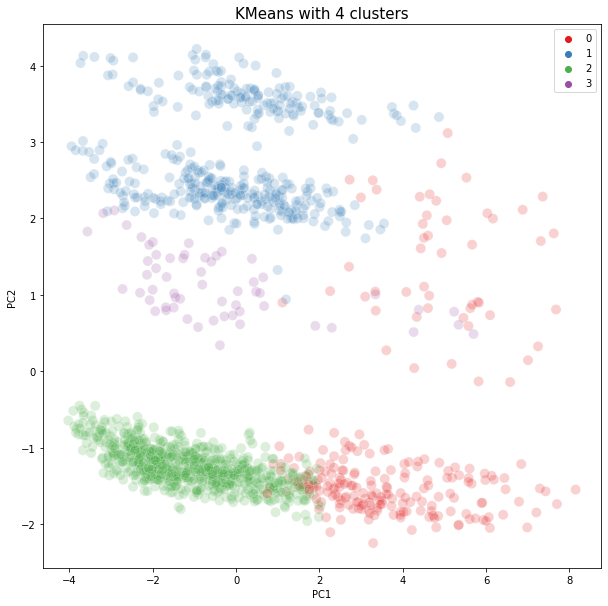

In [6]:
pca2 = PCA(n_components=2).fit(df_scale2)
pca2d = pca2.transform(df_scale2)
plt.figure(figsize = (10,10))
sns.scatterplot(pca2d[:,0], pca2d[:,1], 
                hue=labels_scale, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans with 4 clusters', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

# PCA

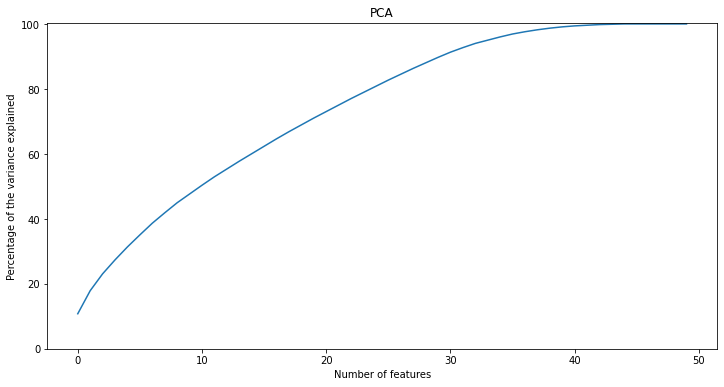

In [7]:
pca = PCA(n_components=50)
pca.fit(df_scale)
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('Percentage of the variance explained')
plt.xlabel('Number of features')
plt.title('PCA')
plt.ylim(0,100.5)
plt.plot(var)

In [8]:
n_components = 10
pca = PCA(n_components=n_components)

cols = []
for i in range(n_components):
    
    col = 'pc'+str(i)
    cols.append(col)


pca_scale = pca.fit_transform(df_scale)
pca_df_scale = pd.DataFrame(pca_scale, columns=cols)
print(pca.explained_variance_ratio_.sum())

0.4756143412067046


10 components expliquent 47% de la variance

Text(0, 0.5, 'Sum of squared distances')

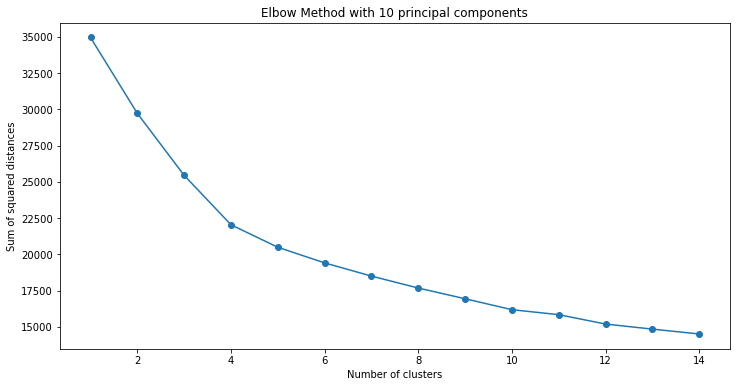

In [9]:
sse = []

for k in range(1, 15):
    
    km = KMeans(n_clusters = k)
    km.fit(pca_df_scale)
    sse.append([k, km.inertia_])
    
pca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Elbow Method with 10 principal components')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')

In [10]:
kmeans_pca_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(pca_df_scale)
print('Silhouette Score: {}'.format(silhouette_score(pca_df_scale, kmeans_pca_scale.labels_, metric='euclidean')))
print('Calinski Harabasz Score: {}'.format(calinski_harabasz_score(pca_df_scale, kmeans_pca_scale.labels_)))
print('Davies Bouldin Score: {}'.format(davies_bouldin_score(pca_df_scale, kmeans_pca_scale.labels_)))
labels_pca_scale = kmeans_pca_scale.labels_
clusters_pca_scale = pd.concat([pca_df_scale, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

Silhouette Score: 0.216428692376301
Calinski Harabasz Score: 286.496794119705
Davies Bouldin Score: 1.5096518902042741


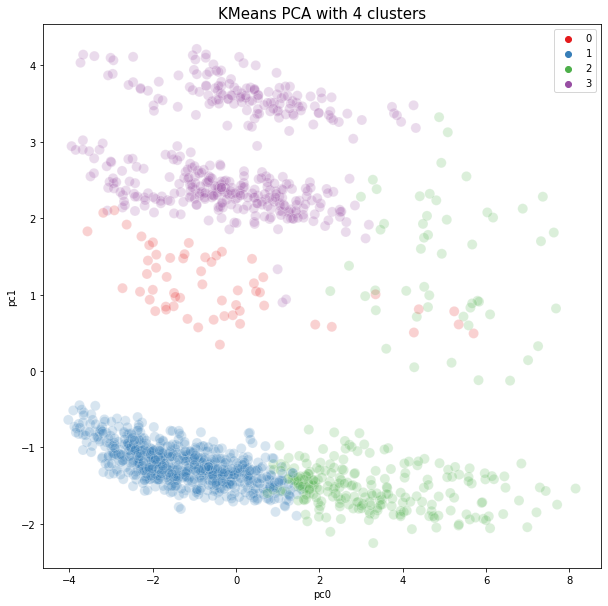

In [11]:
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_pca_scale.iloc[:,0],clusters_pca_scale.iloc[:,1], 
                hue=labels_pca_scale, palette='Set1', s=100, alpha=0.2).set_title(
    'KMeans PCA with 4 clusters', fontsize=15)
plt.legend()
plt.show()

# TSNE

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1470 samples in 0.000s...
[t-SNE] Computed neighbors for 1470 samples in 0.074s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1470
[t-SNE] Computed conditional probabilities for sample 1470 / 1470
[t-SNE] Mean sigma: 2.953702
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.045921
[t-SNE] KL divergence after 3900 iterations: 1.015499


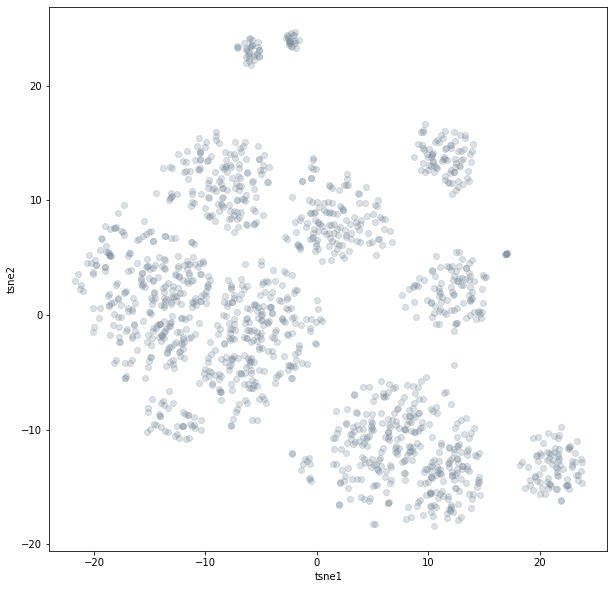

In [12]:
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=5000, learning_rate=200, random_state = 42)
tsne_scale_results = tsne.fit_transform(df_scale)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Text(0, 0.5, 'Sum of squared distances')

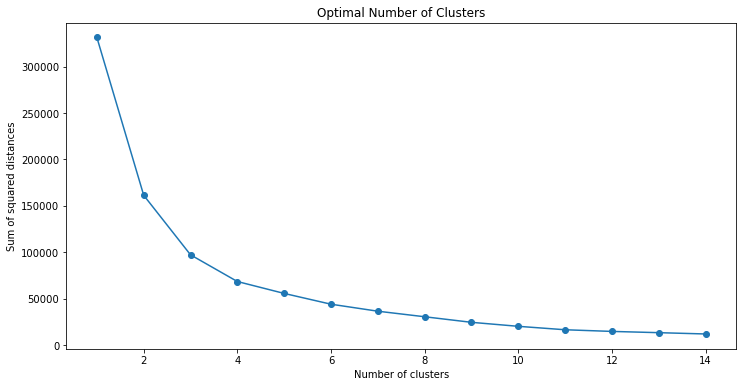

In [13]:
sse = []

for k in range(1, 15):
    
    km = KMeans(n_clusters=k)
    km.fit(tsne_df_scale)
    sse.append([k, km.inertia_])
    
tsne_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')

In [14]:
kmeans_tsne_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)
print('Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
print('Calinski Harabasz Score: {}'.format(calinski_harabasz_score(tsne_df_scale, kmeans_tsne_scale.labels_)))
print('Davies Bouldin Score: {}'.format(davies_bouldin_score(tsne_df_scale, kmeans_tsne_scale.labels_)))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

Silhouette Score: 0.48083800077438354
Calinski Harabasz Score: 1876.3388964653666
Davies Bouldin Score: 0.7602840140710696


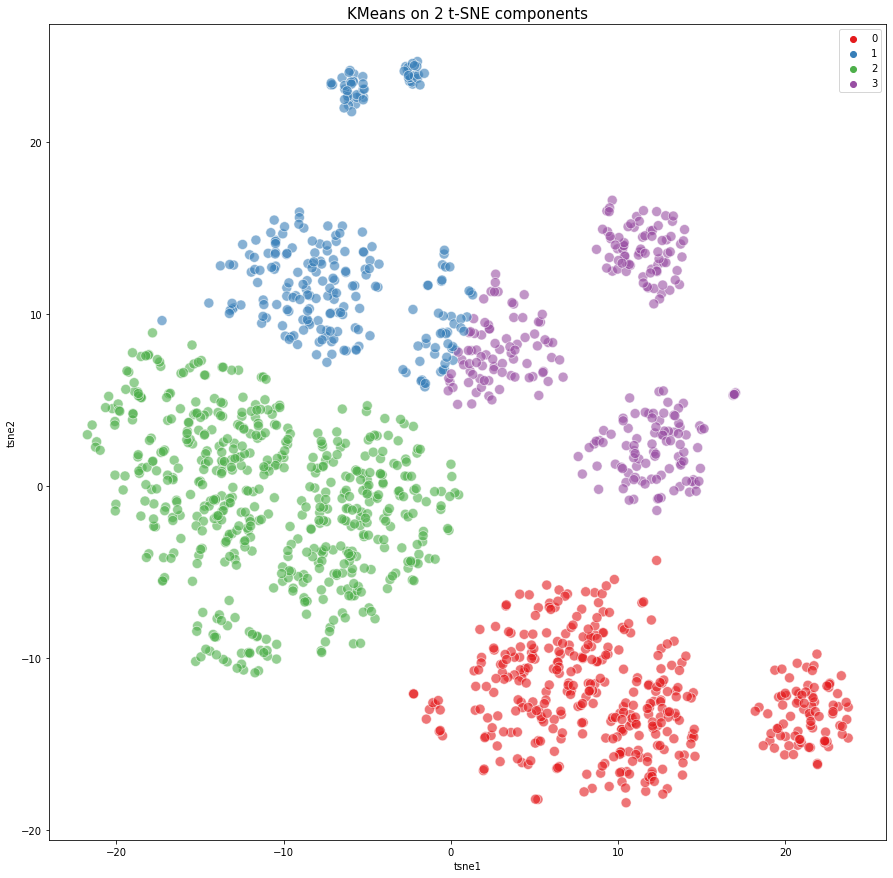

In [15]:
plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],
                hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title(
    'KMeans on 2 t-SNE components', fontsize=15)
plt.legend()
plt.show()

# Clusters analysis

In [16]:
cluster_tsne_profile = pd.merge(df, clusters_tsne_scale['tsne_clusters'], left_index=True, right_index=True )
cluster_tsne_profile.head()

,age,dailyrate,distancefromhome,education,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,...,jobrole_manufacturing_director,jobrole_research_director,jobrole_research_scientist,jobrole_sales_executive,jobrole_sales_representative,maritalstatus_divorced,maritalstatus_married,maritalstatus_single,y,tsne_clusters
0,41,1102,1,2,2,0,94,3,2,4,...,0,0,0,1,0,0,0,1,1,0
1,49,279,8,1,3,1,61,2,2,2,...,0,0,1,0,0,0,1,0,0,2
2,37,1373,2,2,4,1,92,2,1,3,...,0,0,0,0,0,0,0,1,1,2
3,33,1392,3,4,4,0,56,3,1,3,...,0,0,1,0,0,0,1,0,0,2
4,27,591,2,1,1,1,40,3,1,2,...,0,0,0,0,0,0,1,0,0,2


In [17]:
cluster_tsne_profile.groupby("tsne_clusters").maritalstatus_single.mean().sort_index()

tsne_clusters
0    0.352078
1    0.297959
2    0.355717
3    0.215094
Name: maritalstatus_single, dtype: float64

In [18]:
cluster_tsne_profile.groupby("tsne_clusters").maritalstatus_married.mean().sort_index()

tsne_clusters
0    0.452323
1    0.432653
2    0.431942
3    0.543396
Name: maritalstatus_married, dtype: float64

In [19]:
cluster_tsne_profile.groupby("tsne_clusters").jobrole_sales_representative.mean().sort_index()

tsne_clusters
0    0.202934
1    0.000000
2    0.000000
3    0.000000
Name: jobrole_sales_representative, dtype: float64

In [20]:
cluster_tsne_profile.groupby("tsne_clusters").jobrole_sales_executive.mean().sort_index()

tsne_clusters
0    0.797066
1    0.000000
2    0.000000
3    0.000000
Name: jobrole_sales_executive, dtype: float64

In [21]:
cluster_tsne_profile.groupby("tsne_clusters").jobrole_research_scientist.mean().sort_index()

tsne_clusters
0    0.000000
1    0.000000
2    0.529946
3    0.000000
Name: jobrole_research_scientist, dtype: float64

In [22]:
cluster_tsne_profile.groupby("tsne_clusters").jobrole_research_director.mean().sort_index()

tsne_clusters
0    0.000000
1    0.000000
2    0.000000
3    0.301887
Name: jobrole_research_director, dtype: float64

In [23]:
cluster_tsne_profile.groupby("tsne_clusters").jobrole_manufacturing_director.mean().sort_index()

tsne_clusters
0    0.000000
1    0.591837
2    0.000000
3    0.000000
Name: jobrole_manufacturing_director, dtype: float64

In [24]:
cluster_tsne_profile.groupby("tsne_clusters").jobrole_manager.mean().sort_index()

tsne_clusters
0    0.000000
1    0.000000
2    0.000000
3    0.384906
Name: jobrole_manager, dtype: float64

In [25]:
cluster_tsne_profile.groupby("tsne_clusters").jobrole_laboratory_technician.mean().sort_index()

tsne_clusters
0    0.000000
1    0.000000
2    0.470054
3    0.000000
Name: jobrole_laboratory_technician, dtype: float64

In [26]:
cluster_tsne_profile.groupby("tsne_clusters").jobrole_human_resources.mean().sort_index()

tsne_clusters
0    0.000000
1    0.212245
2    0.000000
3    0.000000
Name: jobrole_human_resources, dtype: float64

In [27]:
cluster_tsne_profile.groupby("tsne_clusters").jobrole_healthcare_representative.mean().sort_index()

tsne_clusters
0    0.000000
1    0.195918
2    0.000000
3    0.313208
Name: jobrole_healthcare_representative, dtype: float64

In [28]:
cluster_tsne_profile.groupby("tsne_clusters").educationfield_medical.mean().sort_index()

tsne_clusters
0    0.202934
1    0.269388
2    0.366606
3    0.426415
Name: educationfield_medical, dtype: float64

In [29]:
cluster_tsne_profile.groupby("tsne_clusters").educationfield_marketing.mean().sort_index()

tsne_clusters
0    0.354523
1    0.000000
2    0.000000
3    0.052830
Name: educationfield_marketing, dtype: float64

In [30]:
cluster_tsne_profile.groupby("tsne_clusters").educationfield_human_resources.mean().sort_index()

tsne_clusters
0    0.000000
1    0.085714
2    0.000000
3    0.022642
Name: educationfield_human_resources, dtype: float64

In [31]:
cluster_tsne_profile.groupby("tsne_clusters").educationfield_life_sciences.mean().sort_index()

tsne_clusters
0    0.327628
1    0.477551
2    0.457350
3    0.388679
Name: educationfield_life_sciences, dtype: float64

In [32]:
cluster_tsne_profile.groupby("tsne_clusters").department_sales.mean().sort_index()

tsne_clusters
0    1.000000
1    0.000000
2    0.000000
3    0.139623
Name: department_sales, dtype: float64

In [33]:
cluster_tsne_profile.groupby("tsne_clusters").department_research_development.mean().sort_index()

tsne_clusters
0    0.000000
1    0.787755
2    1.000000
3    0.818868
Name: department_research_development, dtype: float64

In [34]:
cluster_tsne_profile.groupby("tsne_clusters").department_human_resources.mean().sort_index()

tsne_clusters
0    0.000000
1    0.212245
2    0.000000
3    0.041509
Name: department_human_resources, dtype: float64

In [35]:
cluster_tsne_profile.groupby("tsne_clusters").yearswithcurrmanager.mean().sort_index()

tsne_clusters
0    4.066015
1    4.244898
2    3.250454
3    5.913208
Name: yearswithcurrmanager, dtype: float64

In [36]:
cluster_tsne_profile.groupby("tsne_clusters").yearssincelastpromotion.mean().sort_index()

tsne_clusters
0    2.195599
1    1.726531
2    1.466425
3    4.101887
Name: yearssincelastpromotion, dtype: float64

In [37]:
cluster_tsne_profile.groupby("tsne_clusters").yearsincurrentrole.mean().sort_index()

tsne_clusters
0    4.278729
1    4.228571
2    3.239564
3    6.211321
Name: yearsincurrentrole, dtype: float64

In [38]:
cluster_tsne_profile.groupby("tsne_clusters").yearsatcompany.mean().sort_index()

tsne_clusters
0     6.567237
1     6.673469
2     5.068966
3    12.030189
Name: yearsatcompany, dtype: float64

In [39]:
cluster_tsne_profile.groupby("tsne_clusters").totalworkingyears.mean().sort_index()

tsne_clusters
0     9.797066
1    11.718367
2     7.687840
3    20.630189
Name: totalworkingyears, dtype: float64

In [40]:
cluster_tsne_profile.groupby("tsne_clusters").joblevel.mean().sort_index()

tsne_clusters
0    2.075795
1    2.212245
2    1.219601
3    3.664151
Name: joblevel, dtype: float64

In [41]:
cluster_tsne_profile.groupby("tsne_clusters").monthlyincome.mean().sort_index()

tsne_clusters
0     6052.012225
1     6572.465306
2     3238.655172
3    13921.822642
Name: monthlyincome, dtype: float64

In [42]:
cluster_tsne_profile.groupby("tsne_clusters").y.mean().sort_index()

tsne_clusters
0    0.220049
1    0.102041
2    0.197822
3    0.049057
Name: y, dtype: float64

In [43]:
cluster_tsne_profile.groupby("tsne_clusters").dailyrate.mean().sort_index()

tsne_clusters
0    803.975550
1    795.408163
2    798.600726
3    814.807547
Name: dailyrate, dtype: float64

In [44]:
cluster_tsne_profile.groupby("tsne_clusters").gender.mean().sort_index()

tsne_clusters
0    0.584352
1    0.567347
2    0.638838
3    0.573585
Name: gender, dtype: float64

In [45]:
cluster_tsne_profile.groupby("tsne_clusters").age.mean().sort_index()

tsne_clusters
0    35.564792
1    37.779592
2    34.170599
3    43.954717
Name: age, dtype: float64

In [46]:
cluster_tsne_profile.tsne_clusters.value_counts()/1470

2    0.374830
0    0.278231
3    0.180272
1    0.166667
Name: tsne_clusters, dtype: float64

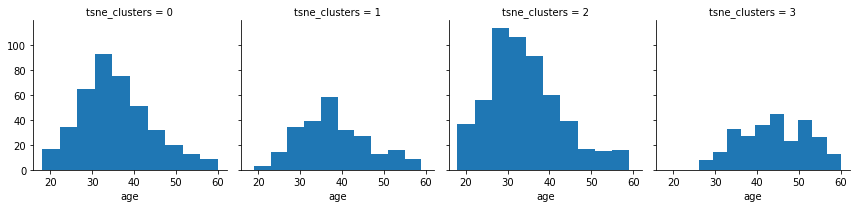

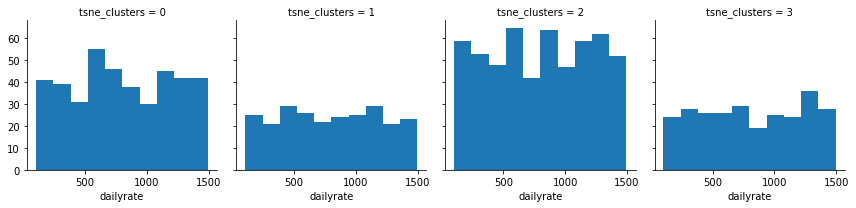

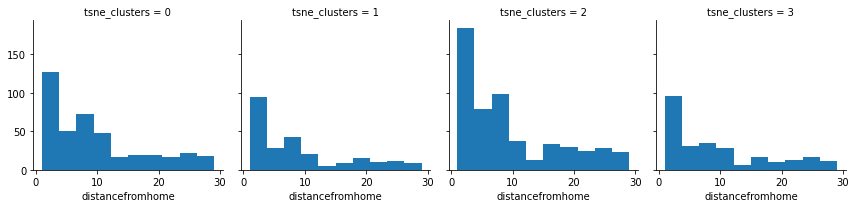

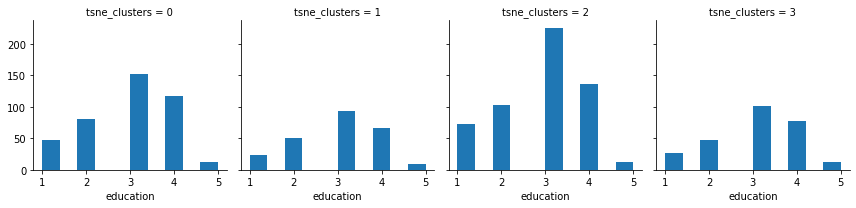

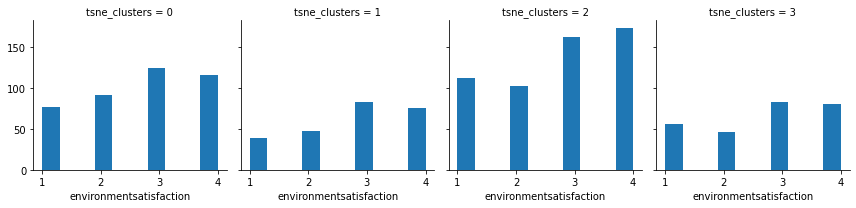

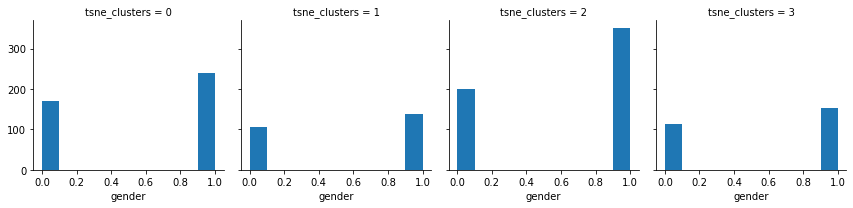

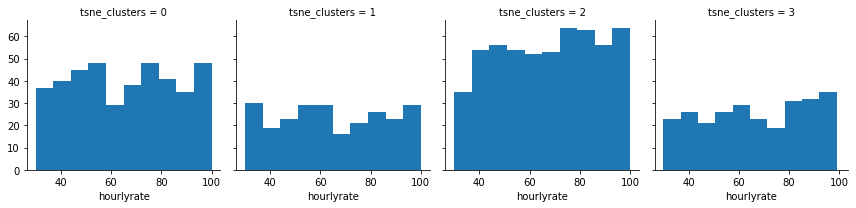

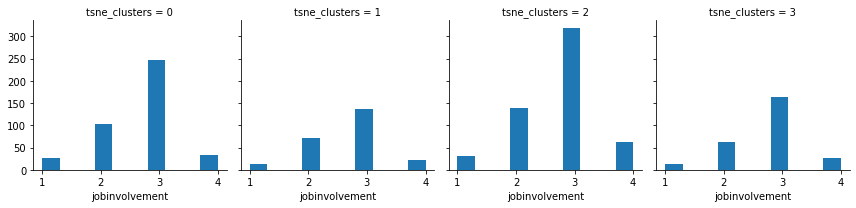

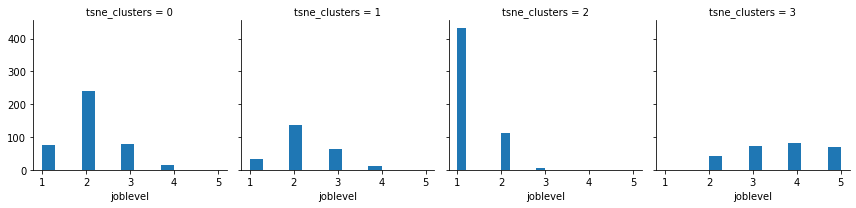

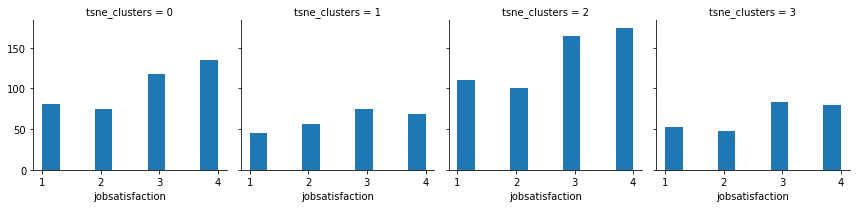

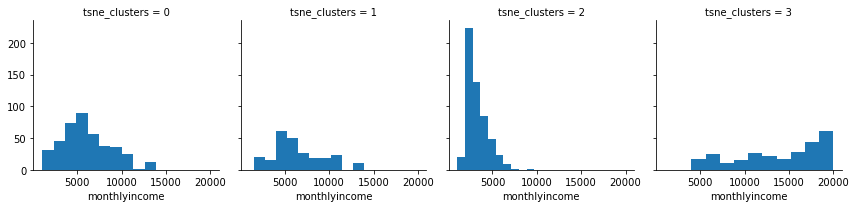

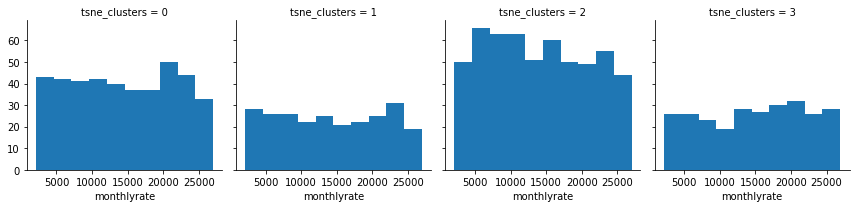

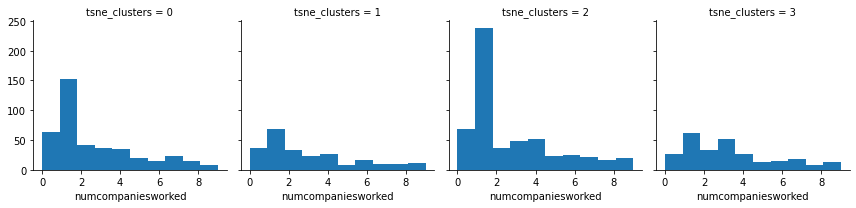

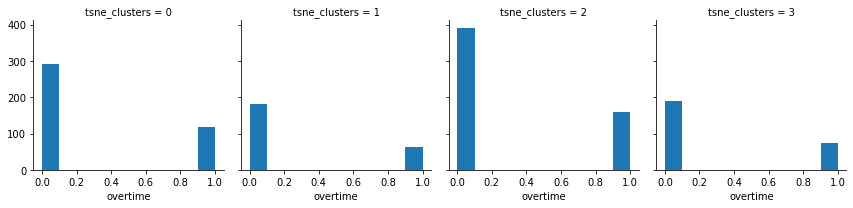

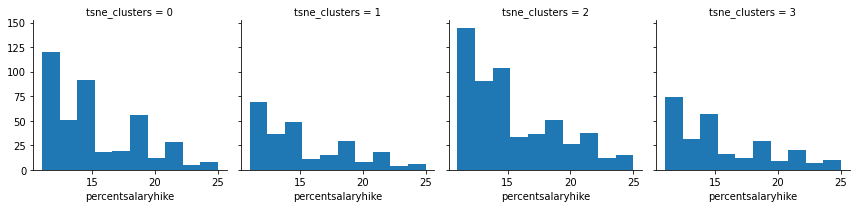

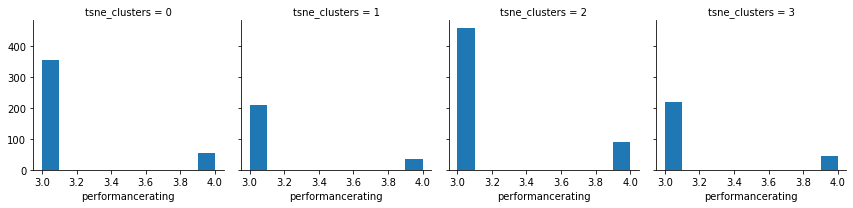

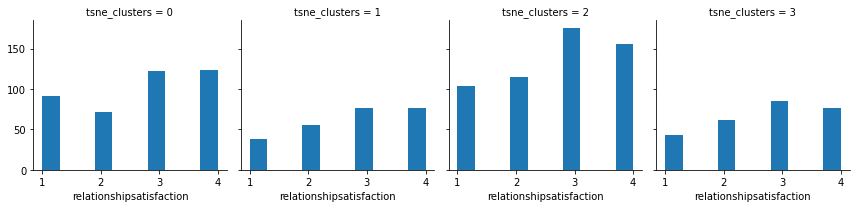

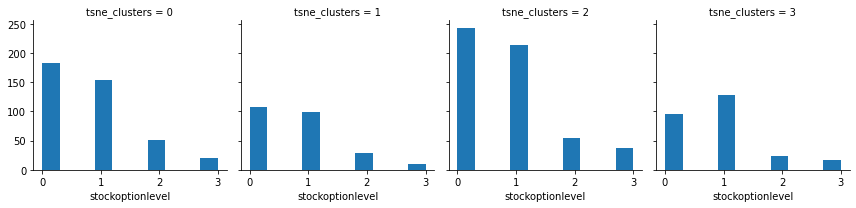

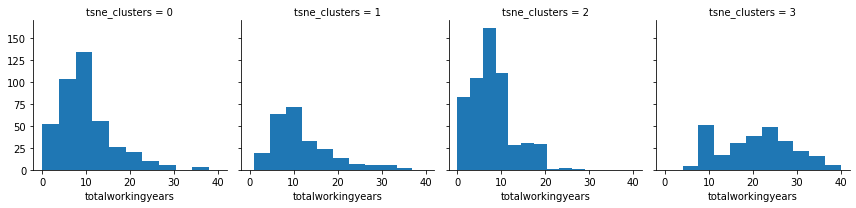

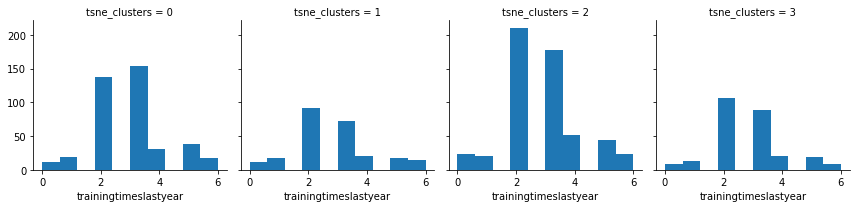

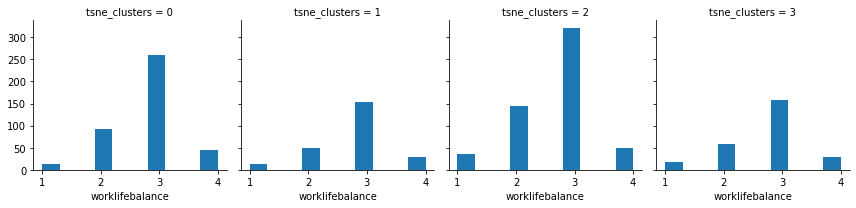

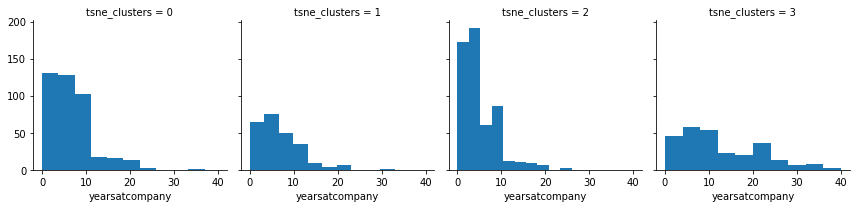

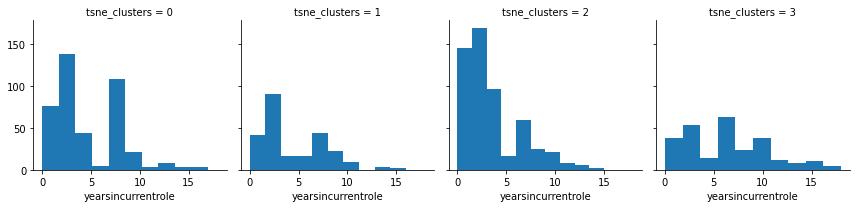

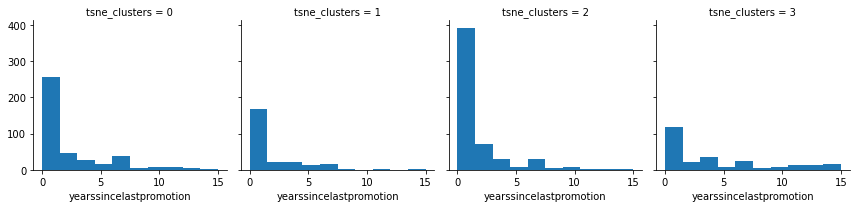

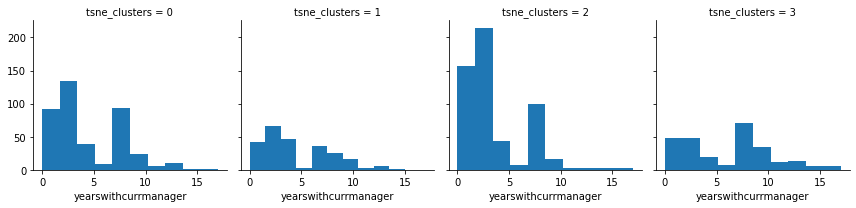

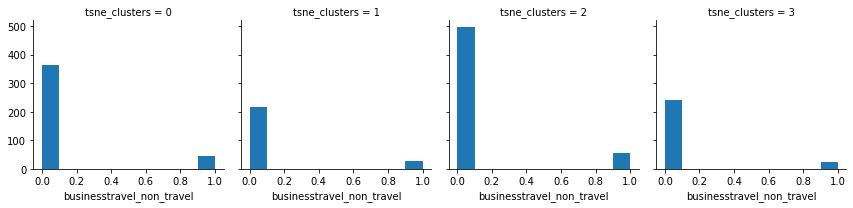

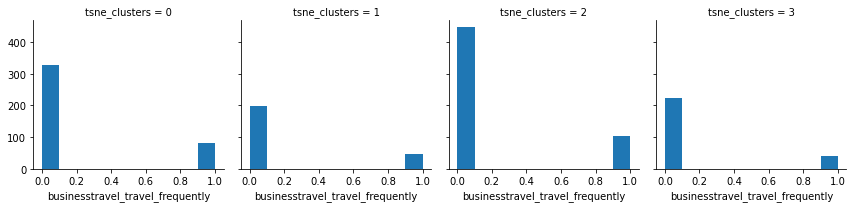

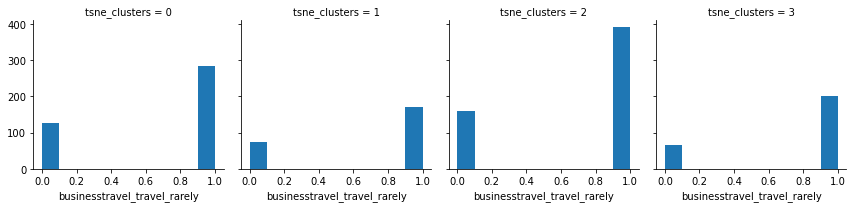

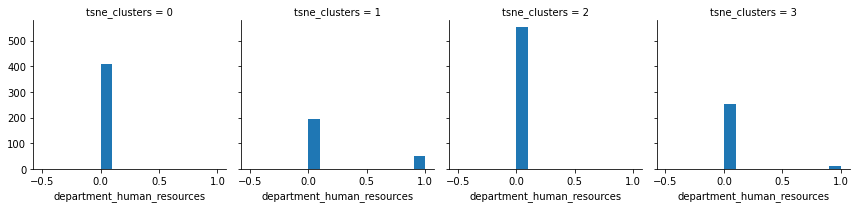

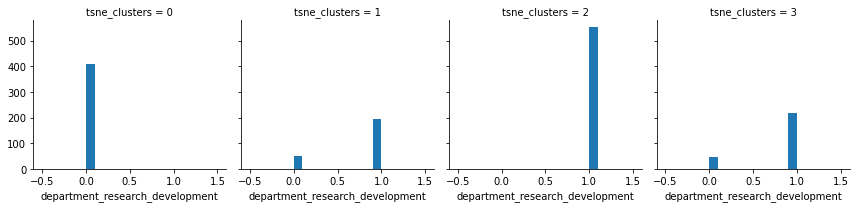

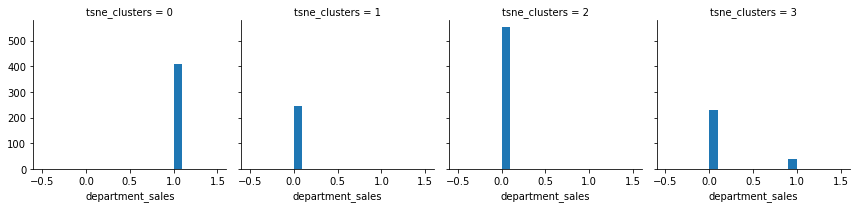

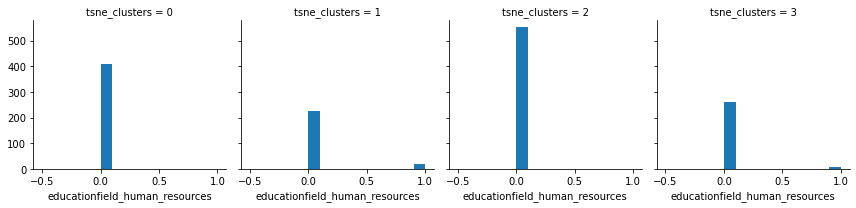

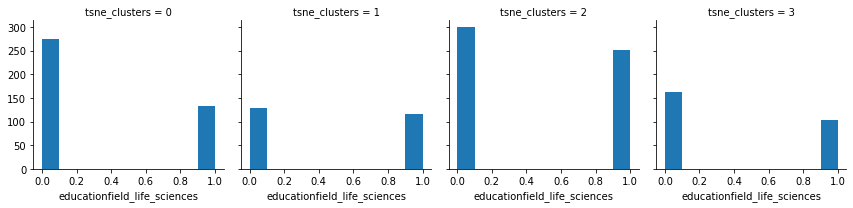

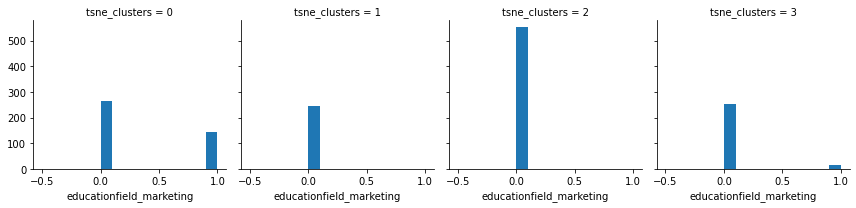

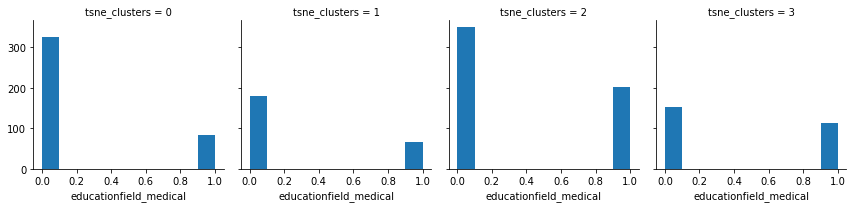

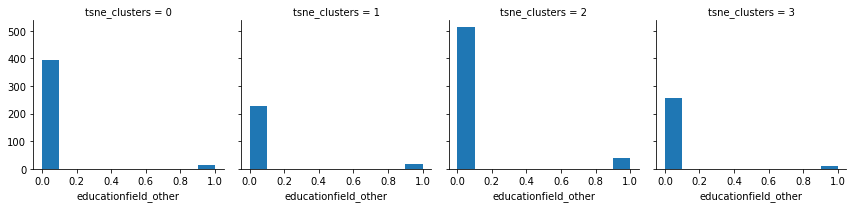

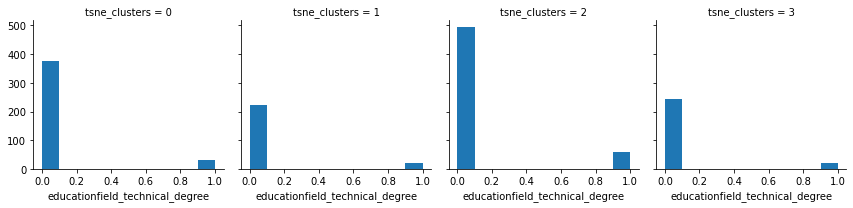

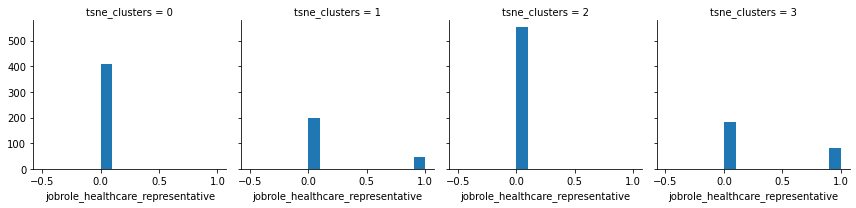

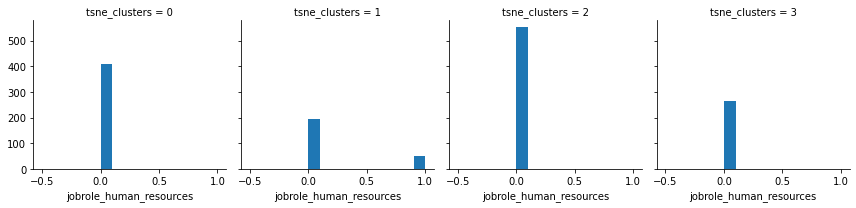

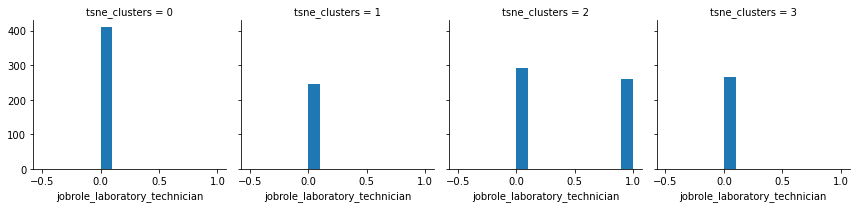

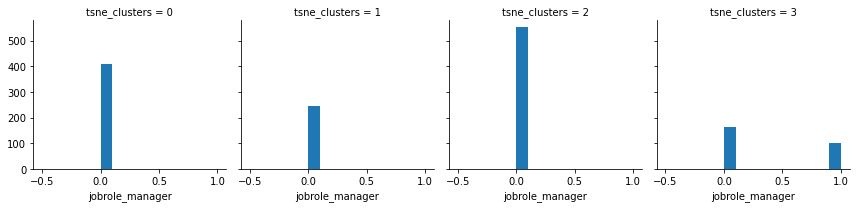

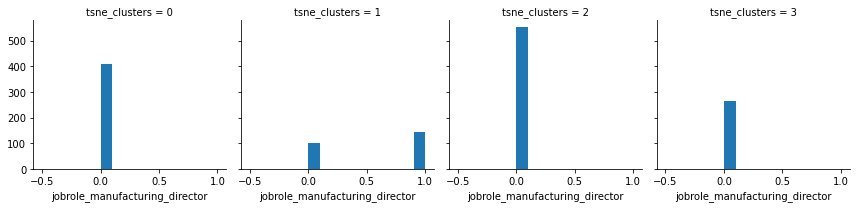

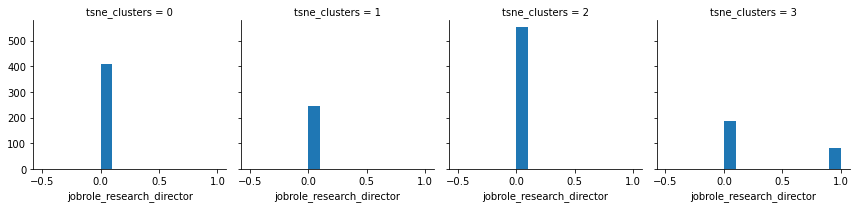

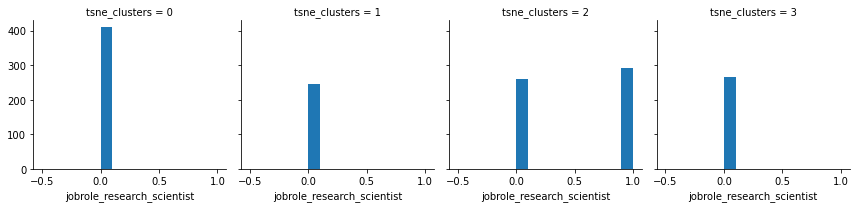

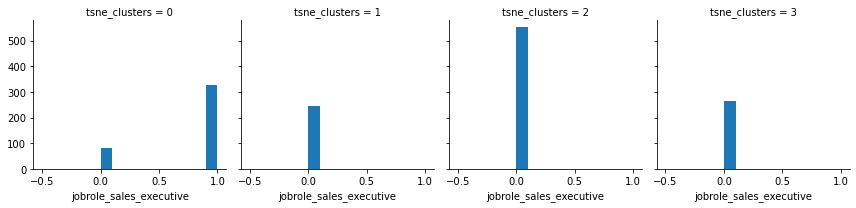

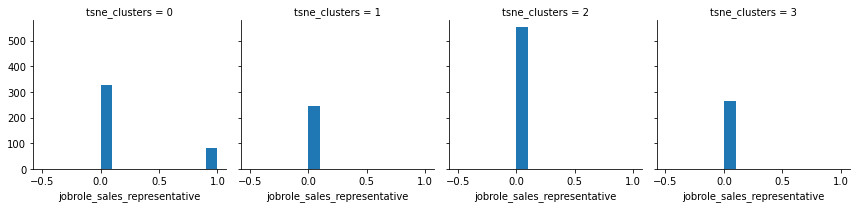

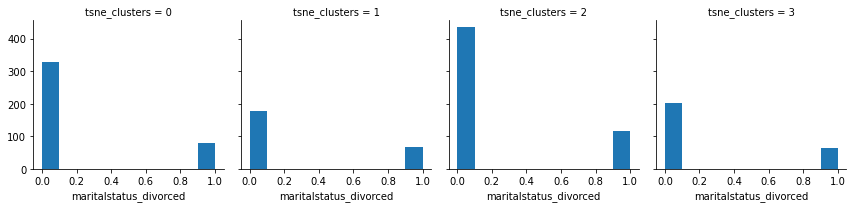

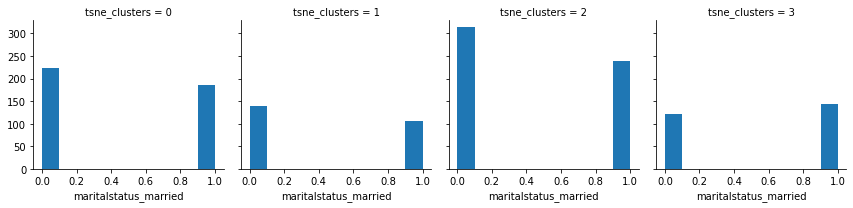

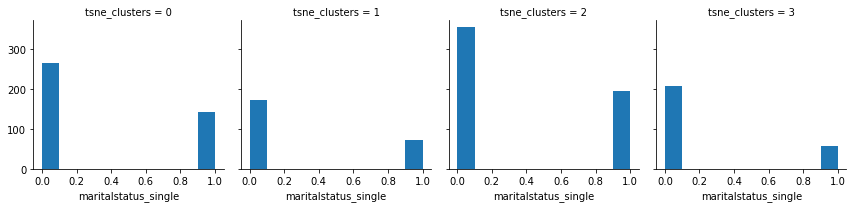

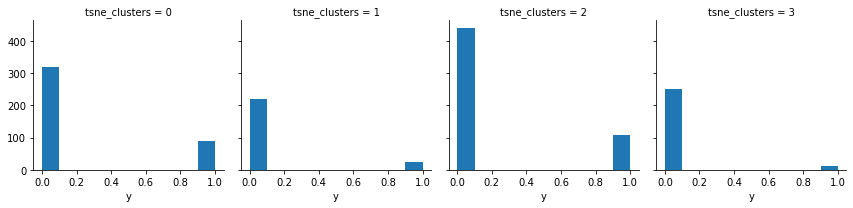

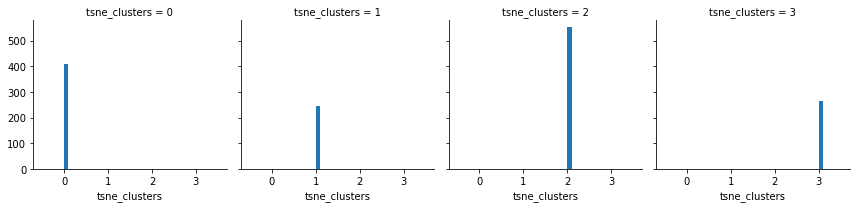

In [47]:
for c in cluster_tsne_profile:
    grid = sns.FacetGrid(cluster_tsne_profile, col='tsne_clusters')
    grid.map(plt.hist, c)